# 2장. 중심적 경향 측정하기

### 나눔 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

### 1. 평균의 종류
① 평균값 (Mean)  
② 중앙값 (Median)  
③ 최빈값 (Mode)  




### 2. 평균값(Mean)

__✏️ 예제__  
: 파워 워크아웃 교실 참가자들의 나이

---
`19, 20, 20, 20, 21`

질문 : __참가자들의 나이 평균값은 ?__

답 :
$\frac{나이의 총합}{참가자 수} = \frac{19 + 20 + 20 + 20 + 21}{5}$

__일반화__  
평균값($\mu$) = $\frac{ΣX}{n}$
-  $\mu$ : 평균값을 나타내는 기호
- $X$ : 개별 데이터를 나타내는 기호
- $n$ : 조사대상 총 개수를 나타내는 기호

$Σn = 개별\ 데이터의\ 총\ 합 = {x_1} + {x_2} + … + {x_n}$ 
- $Σ$ : 시그마(합을 나타내는 기호)
- ${x_i}$ : $i$번째 대상과 관련된 숫자 (예 : 나이, 체중, 키, 가격, 재산 등등)

__✏️ 예제__  
: 파워 워크아웃 교실 참가자들의 나이를 담은 표 살펴보기


|나이|도수(참가자 수)|
|:--:|:--:|
|19|1|
|20|3|
|21|1|

질문 : __참가자들의 나이 평균값은 ?__

답 :
$\frac{(19×1) + (20×3) + (21×1)}{5}$

🛑 막대 그래프는 평균값에 대한 정보를 주지 않는다.

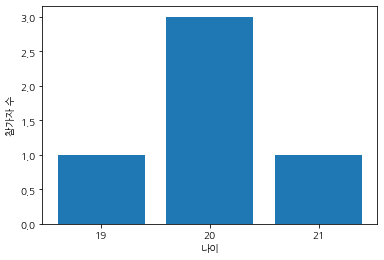

In [ ]:
import matplotlib.pyplot as plt

plt.rc("font", family='NanumGothic')
x = ["19","20", "21"]
y = [1, 3, 1]
plt.bar(x, y) 
plt.xlabel("나이")
plt.ylabel("참가자 수")
plt.show()

### 3. 이상치(Outliers)

평균값의 한계  
__✏️ 예제__  
: 쿵푸교실 참가자들 나이의 평균연령 구하기

---
|나이|도수(참가자 수)|
|:--:|:--:|
|19|3|
|20|6|
|21|3|
|145|1|
|147|1|

__히스토그램으로 연령 분포를 확인해보자.__

Text(0.06, 0.5, '도수')

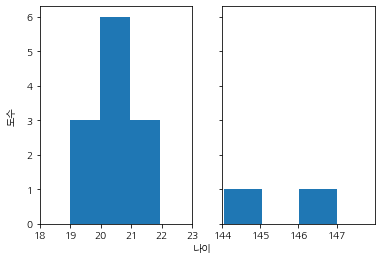

In [ ]:
value_list = [19,19,19,20,20,20,20,20,20,21,21,21,145,147]
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')


ax.hist(value_list,bins=130)
ax2.hist(value_list,bins=130)
ax.set_xlim(18,23)
ax2.set_xlim(144,148)
ax.set_xticks([i for i in range(18,24)])
ax2.set_xticks([i for i in range(144,148)])

f.text(0.5, 0.04, '나이', ha='center', va='center')
f.text(0.06, 0.5, '도수', ha='center', va='center', rotation='vertical')

$평균 연령(\mu) =  \frac{(19×3) + (20×6) + (21×3) + 145 + 147}{14} = 38$

__문제점__  
평균연령이 38세이지만 거의 대부분은 20대 초반임.  
나이가 아주 많은 두 명은 무림의 고수.  
50대 후반의 참가 희망자가 쿵푸수업을 잘 따라갈 수 있을까?  
참가자들 나이 평균값(평균연령)만을 보고 참가신청하면 매우 고생할 수 있음.

__원인__  
두 개의 이상치_(극단적인 값)_ 존재 !  
즉, 145, 147 두 개의 이상치가 평균값을 왜곡시킴.

__결론__  
이상치를 포함한 평향된 데이터는 조심해서 다루어야함.  
또한 이상치를 고려하여 평균을 정해야함.  
위 예제의 경우 평균값보다 중앙값이 참가자들의 나이를 보다 잘 대표함.

### 4. 중앙값(Median)
정의 : __가운데에 위치한 값__

__✏️ 예제 1__  

|19|19|20|20|<20>|21|21|100|102|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|

__✏️ 예제 2__  

|19|20|20|<20>|<21>|21|100|102|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|

▶ 두 수의 평균값(__20.5__)

__중앙값 구하기 3단계__  
① 주어진 $N$개의 데이터를 크기순으로 정렬   
② $N$이 홀수인 경우
- 중앙값 = $\frac{N+1}{2}$번째 위치한 데이터

③ $N$이 짝수인 경우
- 중앙값 = $\frac{N}{2}$번째 데이터와 $\frac{N}{2}+1$번째 데이터의 평균값

---

__편향된 데이터의 평균값과 중앙값 비교__  
① 오른쪽으로 편향된 데이터
- 평균값이 중앙값보다 크도록 만드는 이상치가 포함된 데이터 

__✏️ 예제__  

|값|도수|
|:--:|:--:|
|1|4|
|2|6|
|3|4|
|4|4|
|5|3|
|6|2|
|7|1|
|8|1|

- 중앙값  
= 3  
- 평균값  
$= \frac{4 + (2×6) + (3×4) + (4×4) + (5×3) + (6×2) + 7 + 8}{25} = 3.44$

__결론__ : 중앙값 __<__ 평균값  
__데이터의 그래프는 아래 모양을 갖는다.__
- 평균값을 끌어올리는 이상치가 포함됨

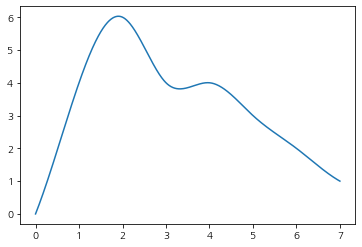

In [ ]:
from scipy.interpolate import make_interp_spline
import numpy as np

x = [x for x in range(0,9)]
y = [0, 4, 6, 4, 4, 3, 2, 1, 1]

model=make_interp_spline(x, y)

xs=np.linspace(0,7,1000)
ys=model(xs)

plt.plot(xs, ys)
plt.show()

② 왼쪽으로 편향된 데이터
- 평균값이 중앙값보다 작도록 만드는 이상치가 포함된 데이터  

__✏️ 예제__  

|값|도수|
|:--:|:--:|
|1|1|
|4|1|
|6|2|
|8|3|
|9|4|
|10|4|
|11|5|
|12|5|

- 중앙값  
$= 10$  
- 평균값  
$= \frac{1 + 4 + (6×2) + (8×3) + (9×4) + (10×4) + (11×5) + (12×5)}{25} = 9.28$

__결론__ : 중앙값 __>__ 평균값  
__데이터의 그래프는 아래 모양을 갖는다.__
- 평균값을 끌어내리는 이상치가 포함됨

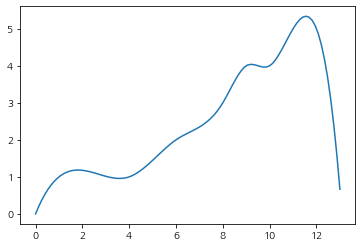

In [ ]:
from scipy.interpolate import make_interp_spline
import numpy as np

x = [0,1,4,6,8,9,10,11,12]
y = [0,1,1,2,3,4,4,5,5]

model=make_interp_spline(x, y)

xs=np.linspace(0,13,100)
ys=model(xs)

plt.plot(xs, ys)
plt.show()

### 4. 최빈값(Mode)

평균값과 중앙값과의 한계

__✏️ 예제__  
부모와 함께하는 아이 수영교실

|나이|도수|
|:--:|:--:|
|1|3|
|2|4|
|3|2|
|31|2|
|32|4|
|33|3|

- 평균값  
$= \frac{(1×3) + (2×4) + (3×2) + (31×2) + (32×4) + (33×3)}{18} = 17$
- 중앙값  
$= 17$  
총 18명. 따라서 9번째 값 3과 10번째 값인 31의 평균값

▶ 두 경우 모두 참가자들을 전혀 대표하지 못함

__데이터의 히스토그램은 아래 모양을 갖는다.__

(array([2., 4., 3.]),
 array([31.        , 31.99966667, 32.99933333, 33.999     ]),
 <a list of 3 Patch objects>)

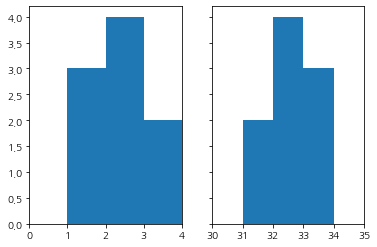

In [ ]:
value_list3 = [1,1.5,1.5,2,2,2,2,3,3.999]
value_list4 = [31,31,32,32,32,32,33,33,33.999]
f,(ax3,ax4) = plt.subplots(1,2,sharey=True)

ax3.set_xlim(0,4)
ax4.set_xlim(30,35)

ax3.hist(value_list3,bins=3)
ax4.hist(value_list4,bins=3)

- __결론__  
한 개의 나이가 아니라 두 개의 나이가 대표성을 가짐.  
이런 경우 최빈값을 활용하며 평균을 구한다.

- __최빈값__ = 가장 큰 도수를 갖는 값 또는 범주

▶ 부모와 함께하는 어린이 수영교실의 경우 2세와 32세 모두 최빈값이 된다.

__✏️ 연습__  
① 

|값|도수|
|:--:|:--:|
|1|4|
|2|6|
|3|4|
|4|4|
|5|3|
|6|2|
|7|1|
|8|1|

▶오른쪽으로 편향됨
- 평균값  
$= \frac{(1×4) + (2×6) + (3×4) + (4×4) + (5×3) + (6×2) + (7×1) + (8×1)}{25} = 3.44$
- 중앙값 $= 3$  
대표성이 가장 큼
- 최빈값  $= 2$ 

②  

|범주|도수|
|:--:|:--:|
|파랑|4|
|빨강|5|
|초록|8|
|분홍|1|
|노랑랑|3|

- 평균값 = (의미없음) 
- 중앙값 = (의미없음)

▶평균값과 중앙값은 숫자와 관련된 데이터에서만 의미 있음.

- 최빈값 = 초록  
대표성이 가장 큼 

③  

|값|도수|
|:--:|:--:|
|1|2|
|2|3|
|3|3|
|4|3|
|5|3|

- 평균값  
$= \frac{(1×2) + (2×3) + (3×3) + (4×3) + (5×3)}{14} = 3.14$  
대표성이 가장 큼
- 중앙값 $= 3$  
데이터가 평향되지 않았을 경우 평균값을 우선시 함.
- 최빈값  $= 2,3,4,5$  
최빈값이 여러개 있을 경우 중요성이 많이 떨어짐. 

### 6. 요약 정리


#### 평균값
1. __계산 방법__ : $\frac{ΣX}{n}$
2. __사용환경__ : 데이터가 비교적 좌우 대칭일 때

#### 중앙값
1. __계산 방법__  
① 모든 값을 오름차순으로 나열  
② 홀수개인 경우 중앙에 위치한 값  
③ 짝수개인 경우 중앙에 위치한 두 값의 평균값

2. __사용환경__ : 데이터가 이상치로 인해 편향된 경우

#### 최빈값
1. __계산방법__  
① 도수가 가장 높은 값값  
② 두 종류 이상의 데이터가 포함되었을 경우 각 그룹에 대한 최빈값 선택

2. __사용환경__  
① 범주적 데이터에서도 사용 가능능  
② 데이터가 두 개 이상의 데이터 그룹을 포함하는 경우


### 7. 연습문제
어떤 회사의 사장이 직원들의 연봉을 올려주고자 함.  
그러면서 두 가지 방식을 제안함.  
- 방식 ① : 모두의 연봉을 동일하게 200만원씩 올리기
- 방식 ② : 각자의 연봉을 10%씩 올리기

현재 직원들의 평균값, 중앙값, 최빈값은 다음과 같다.  

|평균값|중앙값|최빈값|
|:--:|:--:|:--:|
|5,000만원|2,000만원|1,000만원|


__선 그래프 그리기__  
직원들의 연봉에 대한 구체적인 데이터가 없어도 평균 정보를 이용하여 직원 연봉 데이터의 선 그래프를 아래처럼 추정하여 그릴 수 있다.  

<이유>
1. 평균은 주어진 데이터를 대표하는 값이기 때문.
2. __최빈값 < 중앙값 < $μ$__ 이란 사실은 오른쪽으로 편향된 데이터라는 사실을 반영함



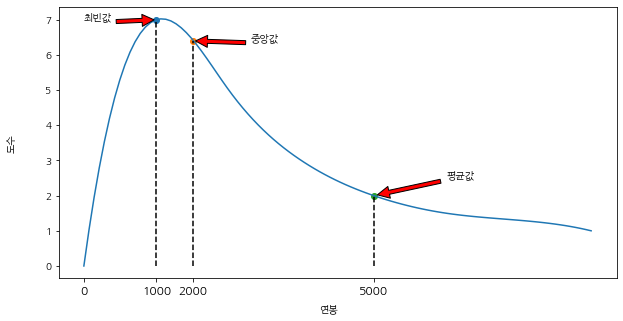

In [ ]:
from scipy.interpolate import make_interp_spline
import numpy as np

x = [0,1,2,3,4,5,6,7]
y = [0,7,5,3,2,1.5,1.3,1]

model=make_interp_spline(x, y)

xs=np.linspace(0,7,100)
ys=model(xs)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks([0, 1, 1.5, 4])
ax.set_xticklabels(['0', '1000', '2000','5000'], fontsize=12)
fig.text(0.5, 0.04, '연봉', ha='center', va='center')
fig.text(0.06, 0.5, '도수', ha='center', va='center', rotation='vertical')

ax.plot(xs, ys)

# 최빈값
ax.scatter(1 ,7)
ax.annotate('최빈값', xy=(1 ,7), xytext=(0 ,7),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.plot([1,1],[0,7], color ='black', linewidth=1.5, linestyle="--")
# 중앙값
ax.scatter(1.5 ,6.4)
ax.annotate('중앙값', xy=(1.5 ,6.4), xytext=(2.3 ,6.4),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.plot([1.5,1.5],[0,6.4], color ='black', linewidth=1.5, linestyle="--")
# 평균값
ax.scatter(4 ,2)
ax.annotate('평균값', xy=(4 ,2), xytext=(5 ,2.5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.plot([4,4],[0,2], color ='black', linewidth=1.5, linestyle="--")

__문제 1__  
방식 ①을 따를 경우 평균값, 중앙값, 최빈값을 계산하라  
- 평균값, 중앙값, 최빈값 모두 일정하게 200만원씩 오른다. 즉,
  - 평균값 = 5,200만원
  - 중앙값 = 2,200만원
  - 최빈값 = 1,200만원 

__문제 2__  
방식 ②를 따를 경우 평균값, 중앙값, 최빈값을 계산하라. 즉,
  - 평균값 = 5,500만원
  - 중앙값 = 2,200만원
  - 최빈값 = 1,100만원 

__문제 3__  
연봉이 평균값에 가까울 경우와 최빈값에 가까운 경우에 따라 연봉인상 방식에 대한 선호도가 다를 수 있다.
  - 경우 1) 개인에 한해서 결정할 경우
    - 중앙값 이상인 경우 : 10% 인상 선호
    - 중앙값 이하인 경우 : 2,000만원 인상 선호
  - 경우 2) 노조 위원장으로서 회사와 임금 인상 협상을 벌여야 하는 경우
    - 노조원 대다수의 입장을 반영하여 결정해야 함.

### 8. 연습문제
2016년 귀속 근로소득 백분위자료  
- 전체 근로소득자 수 : 1,774만명
- 전체 근로 소득자 1인당 평균 월급: 280만원
- 상위 1% (17만 7,400명) 1인당 평균 월급 : 약 2,032만원
- 하위 50% (887만명) 월급 : 200만원 이하

▶ 위 데이터로부터 얻을 수 있는 정보
- 월별 소득의 중간값인 중위소득 : 200만원 정도.  
(실제로는 201만 9,000원)
- 따라서 중위소득 < 평균소득  
▶ 오른쪽으로 편향됨

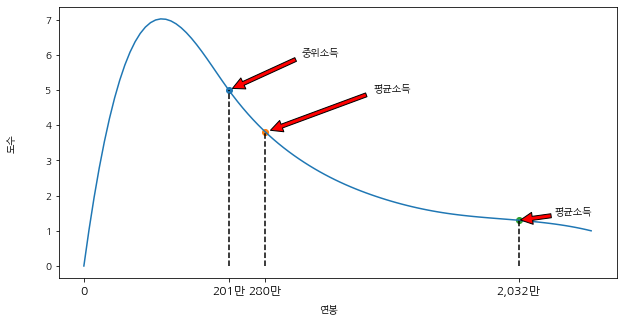

In [ ]:
from scipy.interpolate import make_interp_spline
import numpy as np

x = [0,1,2,3,4,5,6,7]
y = [0,7,5,3,2,1.5,1.3,1]

model=make_interp_spline(x, y)

xs=np.linspace(0,7,100)
ys=model(xs)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks([0, 2, 2.5, 6])
ax.set_xticklabels(['0', '201만', '280만','2,032만'], fontsize=12)
fig.text(0.5, 0.04, '연봉', ha='center', va='center')
fig.text(0.06, 0.5, '도수', ha='center', va='center', rotation='vertical')

ax.plot(xs, ys)
# 중위소득득
ax.scatter(2,5)
ax.annotate('중위소득', xy=(2, 5), xytext=(3, 6),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.plot([2,2],[0,5], color ='black', linewidth=1.5, linestyle="--")
# 평균소득
ax.scatter(2.5 ,3.8)
ax.annotate('평균소득', xy=(2.5 ,3.8), xytext=(4, 5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.plot([2.5,2.5],[0,3.8], color ='black', linewidth=1.5, linestyle="--")

# 평균소득
ax.scatter(6 ,1.3)
ax.annotate('평균소득', xy=(6 ,1.3), xytext=(6.5, 1.5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
ax.plot([6,6],[0,1.3], color ='black', linewidth=1.5, linestyle="--")